# 비지도 학습 
- 지도 학습의 단점 :
  - 지도 학습을 위해서는 `레이블(=정답데이터)`를 부여해야함 
  - 실제 데이터 셋에서 레이블된 데이터가 매우 적을 수 있음 

- `비지도 학습`: 레이블이 필요 없는 학습 

- 비지도 학습의 종류 
  - `군집` : 비슷한 샘플을 `클러스터`로 모음 
  - `이상치 탐지` : 정상치와 `이상치(Outlier)`를 탐지
  - `밀도 추정` : `확률 밀도 함수` 추정

In [56]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import sys
import warnings
# UserWarning 카테고리의 모든 경고를 무시
warnings.filterwarnings("ignore", category=UserWarning)


if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 1. 군집 
> 비슷한 새믈을 구별해 하나의 `클러스터` 혹은 그룹을 할당하는 작업 

### 분류와의 차이점 
- 분류는 사전에 정의된 `레이블`을 사용하여 데이터를 분류하는 작업
- 군집은 `레이블`이 없는 데이터를 비슷한 특성을 가진 그룹으로 묶는 작업

### 센터로이드
- `센터로이드` : 특정 포인트의 중심으로 모인 샘플의 중심 

### 군집의 대표적인 알고리즘 
- k-평균 
- DBSCAN

- 예시 붓꽃 데이터 분류 / 군집 
- 분류 : 레이블에 따라 붓꽃 종류를 분류
- 군집 : 레이블 없이 붓꽃을 비슷한 특성으로 그룹화

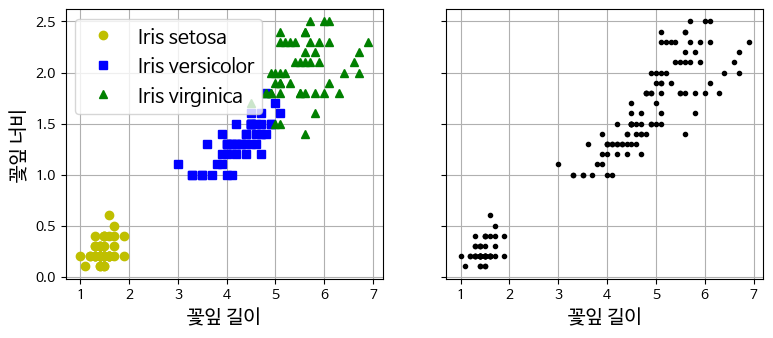

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("꽃잎 길이")
plt.ylabel("꽃잎 너비")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("꽃잎 길이")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

- K- 평균화를 통해 군집화한 경우 

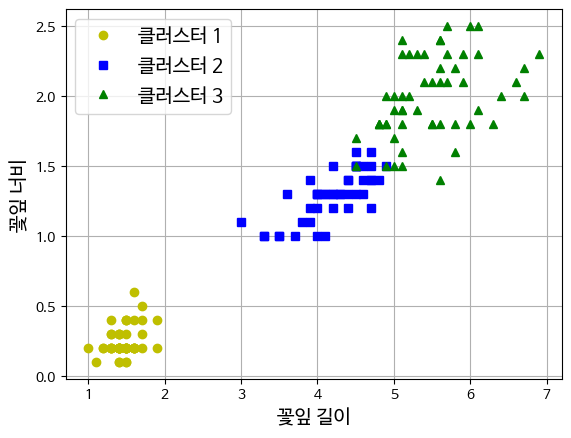

올바르게 분류된 샘플의 비율 :  0.9666666666666667


In [58]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    # SciPy 1.11.0에서 `keepdims` 기본값이 False로 바뀐다는 경고를 피하기 위해 명시적으로 지정함
    mode, _ = stats.mode(y_pred[y==class_id], keepdims=False)
    mapping[mode] = int(class_id)

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="클러스터 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="클러스터 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="클러스터 3")
plt.xlabel("꽃잎 길이")
plt.ylabel("꽃잎 너비")
plt.legend(loc="upper left")
plt.grid()
plt.show()

print("올바르게 분류된 샘플의 비율 : ", (y_pred==y).sum() / len(y_pred))

## 1) k-평균
### k 평균의 샘플 할당 
- 클러스터의 중심을 찾고 샘플 할당하기 
- 알고리즘에서 찾을 클러스터의 개수 `k` 지정 필요 
- `레이블` 대신 `인덱스`를 사용 
- 예측 레이블은 `labels_`에러 확인 가능 
- `cluster_centers_` : 센터로이드 위치 확인 
- 결정 경계를 그려 `보로노이 다이어그램`을 얻을 수도 있음
- `kmeans.transform`을 이용해서 샘플들과 센터로이드 사이 거리 확인 가능 -> 비선형 차원 축소 기법으로도 이용 가능 

 - 예시 : 다섯 개의 센터로이드가 있는 데이터셋

In [59]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

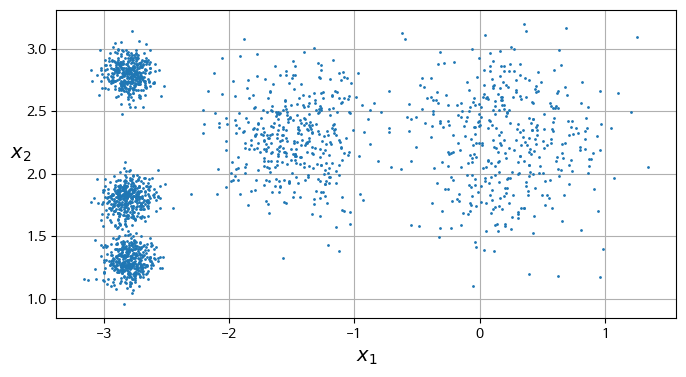

In [60]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [61]:
print("예측값 : ",y_pred)
print("예측값 과 레이블 비교 : ", y_pred is kmeans.labels_)
print("클러스터 중심 : ", kmeans.cluster_centers_)
print("클러스터 중심과 샘플 사이 거리 : ", kmeans.transform(X_new))


예측값 :  [0 0 4 ... 3 1 0]
예측값 과 레이블 비교 :  True
클러스터 중심 :  [[-2.80214068  1.55162671]
 [ 0.08703534  2.58438091]
 [-1.46869323  2.28214236]
 [-2.79290307  2.79641063]
 [ 0.31332823  1.96822352]]
클러스터 중심과 샘플 사이 거리 :  [[2.83778629 0.59082671 1.4955481  2.9042344  0.31493543]
 [5.81943941 2.9710039  4.47759126 5.84739223 2.68685968]
 [1.4618254  3.11488787 1.6912185  0.29040966 3.47026031]
 [0.96879317 3.08818836 1.54672634 0.36159148 3.35573094]]


- 새로운 샘플의 센트로이드 클러스터 할당 

In [62]:
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])

### 예측 진행 
print(kmeans.predict(X_new))

[4 4 3 3]


- 보로노이 다이어그램

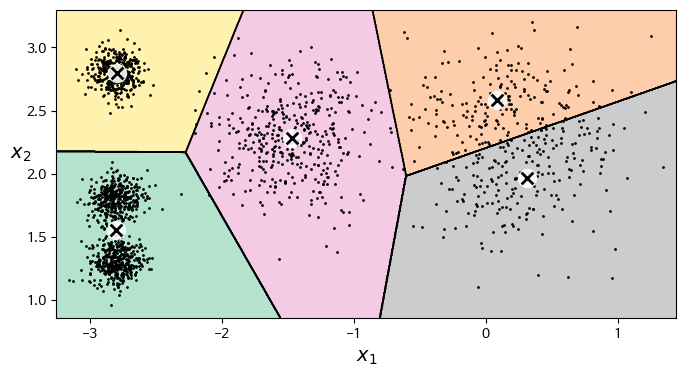

In [63]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

- 할당 결과 
  - 대다수 적절하게 할당되었지만 `결정 경계에서 잘못 할당된 샘플`이 존재 

### 하드 군집과 소프트 군집
- `하드 군집` : 각 샘플을 하나의 클러스터에만 할당
- `소프트 군집` : 클러스터 마다 샘플에 점수를 부여
  - 점수 예시 : `유사도 점수` (가우스 방사 기저 함수)

### k-평균 알고리즘 

#### 센터로이드 위치 초기화
- 센터로이드가 주어지면 k-평균 알고리즘은 각 샘플을 가장 가까운 센터로이드에 할당하고, 센터로이드를 업데이트하는 과정을 반복함
- 센터로이드가 없는 경우, k-평균 알고리즘은 먼저 샘플 중에서 무작위로 k개의 샘플을 선택하여 센터로이드를 초기화함

#### 레이블 할당 
- 샘플에 레이블을 할당
- 센터로이드를 업데이트 방식을 사용
- 센터로이드에 변화가 없을 때 까지 진행 
- 제한된 횟수 안에 수렴하는 것을 보장
    - 샘플과 가장 가까운 센터로이드 사이 평균 제곱거리가 감소만 하며 음수는 불가능 함
    - 단, 수렴은 보장하지만 `적절한 솔루션`으로 수렴은 보장하지 않음 (=지역 최적점으로 수렴)
    - 센터로이드 초기화에 따라 갈림 

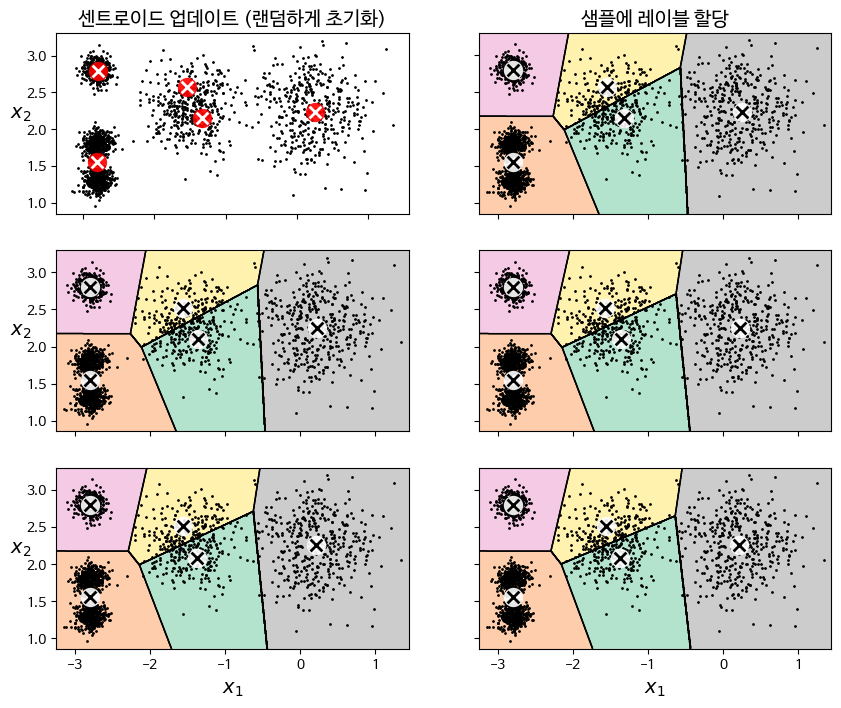

In [64]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("센트로이드 업데이트 (랜덤하게 초기화)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("샘플에 레이블 할당")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

#### 센터로이드 초기화 방법
##### 근사가 가능한 경우 
- `init` 매개 변수로 넘파이 배열을 지정 
- `n_init` 매개 변수를 1로 설정하여 초기화 방법을 고정

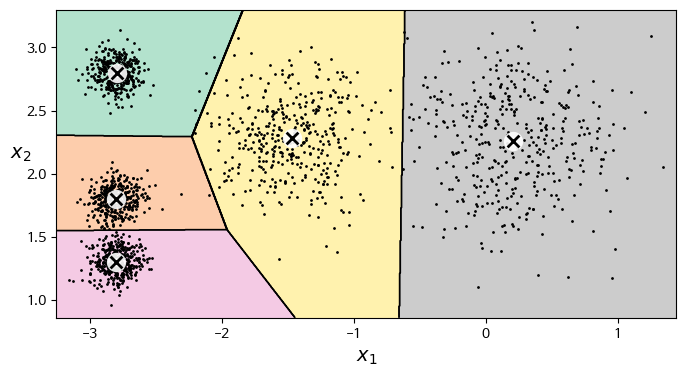

In [65]:
### 센터로이드 근사
good_init = np.array([[-3,3], [-3,2], [-3,1] ,[-1,2] ,[0,2]])

### k평균 선언
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

### k평균 학습
kmeans.fit(X)

### 시각화 
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

##### 랜덤으로 초기화하는 방법 
- `init` 매겨변수를 `random`으로 설정
- `n_init` 매개 변수로 랜덤 초기화 수 설정 

#### 모델 평가 - 이니셔
> 샘플과 가장 가까운 센터로이드 사이의 제곱 거리 합 
- `n_init` 만큼 초기화 방법을 반복하여 이니셔가 가장 낮은 모델 반환 
- `kmeans.inertia_` 속성에 저장됨
 - score 에서는 `음수`를 반환 
- 예측기가 다른 것보다 좋으면 score 점수가 높은 값을 반환해야 하기 때문 

In [66]:
print("모델 이니셔 : ", kmeans.inertia_)
print("socre 는 이니셔의 음수: ", kmeans.score(X))

모델 이니셔 :  211.59853725816836
socre 는 이니셔의 음수:  -211.59853725816834


#### k평균 ++ 알고리즘 
- 초기화 방식을 다른센터로이드와 거리가 먼 센트로이드를 선택
- 최적이 아닌 솔루션으로 수렴할 가능성을 낮춤 
- 반복횟수를 크게 낮출 수 있음 
- KMeans 클래스가 기본적으로 사용함 

##### 초기화 방법 
- 데이터 셋에서 랜덤으로 균등하게 하나의 센터로이드 선택 
- 이미 선택한 센터로이드에서 멀리 떨어진 샘플을 다음 센터로이드로 선택할 가능성의 확률 분포를 이용해 샘플 x 를 새로운 센터로이드를 선택 
- k개의 센터로이드가 선택될 때 까지 이전 단계 반복

#### k평균 속도 개선 및 미니 배치 k평균
##### 엘칸의 알고리즘 
- 클러스터가 많은 일부 대규모 데이터셋에서 불필요한 계산을 피함으로서 알고리즘의 속도를 상승시킴 
  - 삼각 부등식을 이용함 -> 샘플과 센터로이드를 위한 하한선과 상한선이 유지 
  - `algorithm="elkan"으로 설정

##### 미니 배치 k 평균
- 전체 데이터 셋을 사용하지 않고 미니배치를 이용해 센트로이드를 조금씩 이동 
- `MiniBatchMeans` 클래스에 알고리즘 구현 
- 미니 배치 훨씬 빠르지만 `이니셔`가 조금 더 나쁨 

In [67]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

### 이니셔 
print("이니셔 : ",minibatch_kmeans.inertia_)

이니셔 :  211.6594510571261


100/100

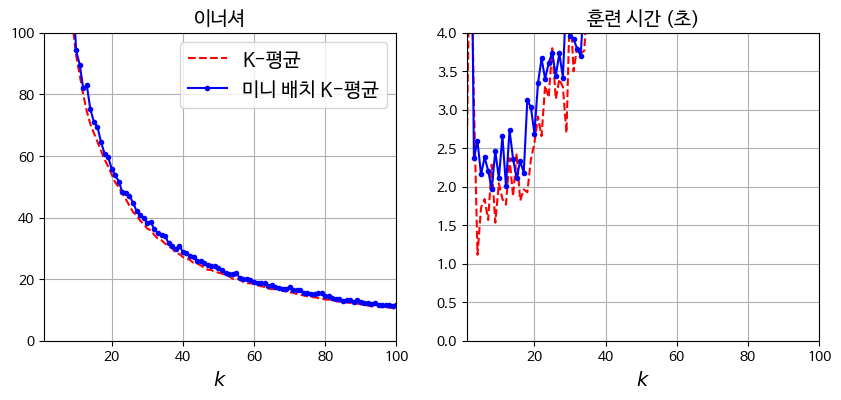

In [69]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    # 사이킷런 1.3에서 'full'이 deprecated 된다는 경고를 피하기 위해 'lloyd'로 지정함
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-평균")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="미니 배치 K-평균")
plt.xlabel("$k$")
plt.title("이너셔")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-평균")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="미니 배치 K-평균")
plt.xlabel("$k$")
plt.title("훈련 시간 (초)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

#### 최적의 클러스터 개수 찾기 
##### 이니셔를 사용하기 
- 이니셔는 k가 증가함에 따라 점점 작아지기 때문에 k를 선택하기 위한 지표로 부적절 
- 이니셔를 k의 함수로 그래프를 그리면 엘보가 나타남

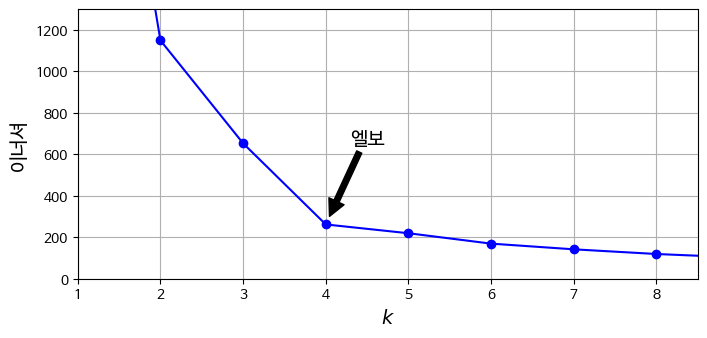

In [70]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("이너셔")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "엘보", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

##### 실루엣 점수 
> 모든 샘플에 대한 `실루엣 계수`의 평균 

- 실루엣 계수 : $(b-a) / max(a,b)$
  - $a$ : 동일 클러스터 내 다른 샘플까지 평균 거리 (클러스터 내부 평균 거리)
  - $b$ : 가장 가까운 다른 클러스터의 샘플까지 평균 거리 (클러스터 외부 평균 거리)
  - 범위 : -1~ +1 
  - `-1` : 클러스터가 잘 못 할당 
  - `+1` : 클러스터가 잘 할당
  - `0` : 경계에 위치 

- `silhouette_score` 함수로 `실루엣 점수` 계산 

In [72]:
from sklearn.metrics import silhouette_score
print("실루엣 점수 : ", silhouette_score(X, kmeans.labels_))

실루엣 점수 :  0.655517642572828


- 실루엣 다이어그램 
  - 실루엣 별로 샘플의 실루엣 점수를 계산하고, 샘플을 클러스터별로 그룹화하여 시각화
  - 수직 선 : 평균 실루엣 점수

- 예시 : 실루엣 점수 그래프
    - k=4 가 가장 좋지만 k=5도 괜찮은 선택이 될 수 있음

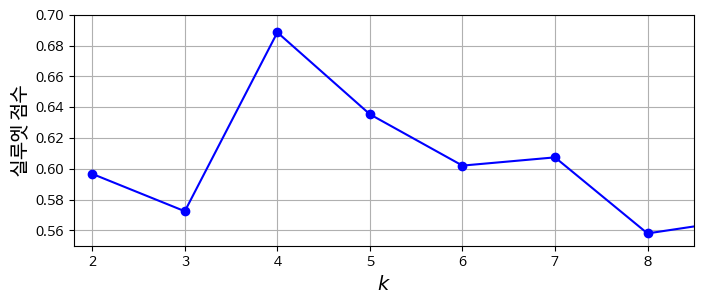

In [73]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("실루엣 점수")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

- 예시 : 실루엣 다이어그램
  - 모든 클러스터의 크기가 거의 같고 평균 실루엣 점수를 나타내는 점선을 모두 교차하는 k=5가 제일 좋은 옵션으 로 볼 수 있음 

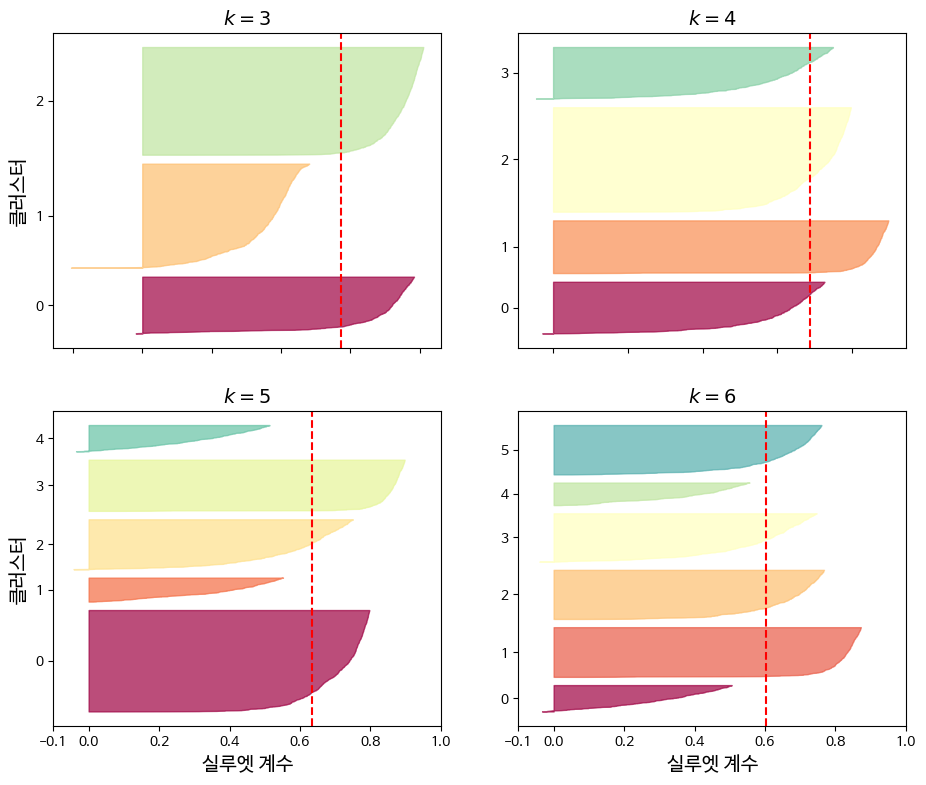

In [74]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("클러스터")
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("실루엣 계수")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

## k 평균의 한계 
- 최적이 아닌 솔루션을 피하기 위해 `여러 번 실행` 해야함 
- `클러스터 개수` 지정이 필수 
- `밀집도`가 서로 다르거나 `원형`이 아닌 경우 작동하지 않음 

- 예시 : 밀집도 및 원형이 아닌 경우

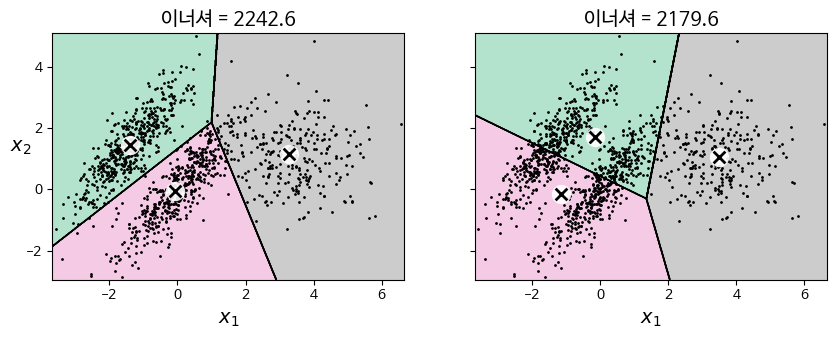

In [75]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"이너셔 = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"이너셔 = {kmeans_bad.inertia_:.1f}")

plt.show()

## 군집을 사용한 이미지 분할 
> 이미지 분할은 여러 개의 세그먼트로 분할하는 작업 

### 이미지 분할의 종류 
- 색상 분할  : 동일한 색상 기반 분할 
- 시멘틱 분할  :  동일한 종류 물체에 속한 픽셀 
- 인스턴스 분할  : 개별 객체에 속한 모든 픽셀 

- 시멘틱 분할 및 인스턴스 분할은 합성곱 신경만 기반 모델이 필요함 
- k 평균을 이용해서는 색상 분할이 제일 적잘 
- `Pillow` 라이브러리를 이용 

- 예시 : ladybug.png 색상 분석

In [81]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [83]:
import PIL
image = np.array(PIL.Image.open(filepath))
image.shape

### RGB 색상 리스트 
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img =kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

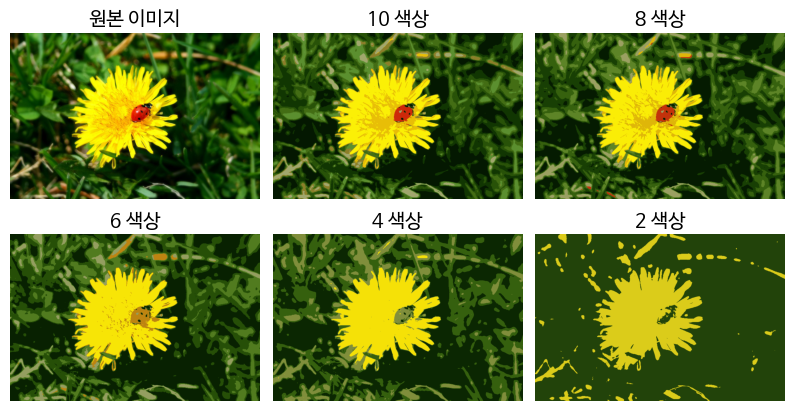

In [84]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("원본 이미지")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} 색상")
    plt.axis('off')

plt.show()


## 군집을 사용한 준지도 학습 
- 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용
- `대표이미지` : 센터로이드에서 가장 가까운 이미지
  - 클러스터를 대표하는 이미지 
- `레이블 전파` : 동일 클러스터 내에 있는 모든 샘플로 전파 
- 일부 이상치를 제거하여 이상치를 제거 -> 성능을 높일 수 있음

In [98]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

### 데이터 로드
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

### 로지스틱 회귀 훈련 
n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

### 정확도 측정 
print("훈련 정확도 : ",log_reg.score(X_test, y_test))

### 전체 훈련 세트를 사용 할 때 정확도 측정 
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
print("전체 훈련 세트 : ",log_reg_full.score(X_test, y_test))

훈련 정확도 :  0.7581863979848866
전체 훈련 세트 :  0.9093198992443325


- 대표 이미지 설정

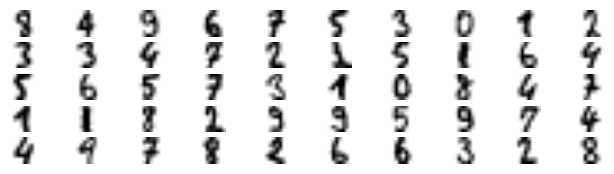

In [99]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

- 성능 확인 

In [103]:
### 수동으로 레이블 선택 
y_representative_digits = np.array([
   8,4,9,6,7,5,3,0,1,2,
   3,3,4,7,2,1,5,1,6,4,
   5,6,5,7,3,1,0,8,4,7,
   1,1,8,2,9,9,5,9,7,4,
   4,9,7,8,2,6,6,3,2,8
])


#### 성능 확인 
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
print("훈련 정확도 : ",log_reg.score(X_test, y_test))

### 레이블 전파 
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

### 성능 다시 확인 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
print("훈련 정확도 : ", log_reg.score(X_test, y_test))

훈련 정확도 :  0.8387909319899244
훈련 정확도 :  0.8589420654911839


- 일부 이상치 제거 : 가장 가까운 99%의 샘플을 유지하고 나머지 1%의 샘플은 제거

In [104]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

- 전파된 레이블의 정확도 확인

In [105]:

(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(0.9548148148148148)

## DBSCAN
> 밀집된 연속적 지역을 클러스터로 정의 

- 모든 클러스터가 밀집되지 않은 지역과 잘 구분될 때 좋은 성능 
- `DBSCAN` 클래스

### 작동 방식 
- $\varepsilon$-이웃 : 샘플에서 작은 거리인 $\eta$ 내 샘플이 몇 개 높여있는지 카운트 
- $\varepsilon$-이웃 내 적어도 `min_samples` 개의 샘플이 있는 경우 : `핵심 샘플`로 간주 
- `핵심 샘플`의 이웃에 있는 샘플은 동일한 클러스터에 속함 
- 다른 핵심 샘플이 포함 될 수 있음 -> 이웃의 이웃은 하나의 클러스터를 형성 
- `핵심샘플`과 `이웃`이 아닌 경우 : `이상치`로 판단
  - 이상치 구분 : 인덱스 `-1` 

### 예측 
- `fit_predict()` 사용 
  - predict를 사용 할 수 없음 : 새로운 샘플에 대해 클러스터를 예측 할 수 없음 

### 단점
- 클러스터 간의 밀집도가 크게 다르거나 일부 클러스터 주변 저밀도 영역이 충분히 없는 경우 잘 되지 않음 
- 계산 복잡도 $O(m^2n)$ -> 대규모 데이터셋 힘듦

In [112]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

print("라벨 확인 : " ,dbscan.labels_[:10])
print("핵심 샘플 인덱스 변수 : ", dbscan.core_sample_indices_[:10])
print("핵심 샘플 : ",dbscan.components_[:10])


라벨 확인 :  [0 0 0 0 1 0 0 0 0 1]
핵심 샘플 인덱스 변수 :  [0 1 2 3 4 5 6 7 8 9]
핵심 샘플 :  [[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 [ 0.37736316 -0.39703717]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]
 [ 1.6201408  -0.28758856]
 [ 0.68246733  0.80712069]]


- eps = 0.2로 늘리면 군집화가 잘됨 

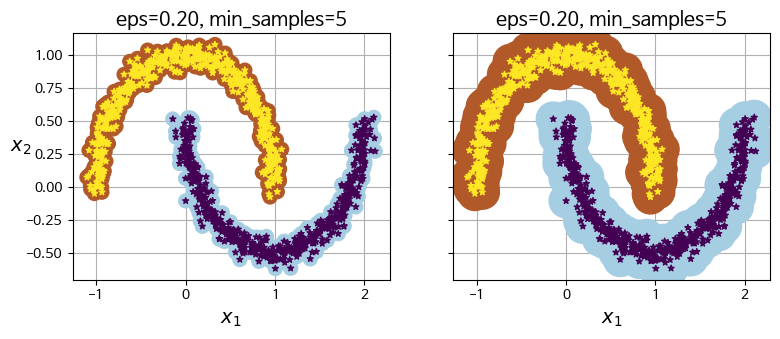

In [114]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

- 예시 : KNeighborsClassifier 훈련 및 예측
  - `proba`를 통해 확률을 확인 할 수 있음 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

### 신규데이터 추가 
X_new=np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
print("예측값 : \n", knn.predict(X_new))
print("예측 확률 : \n", knn.predict_proba(X_new))



예측값 : 
 [1 0 1 0]
예측 확률 : 
 [[0.18 0.82]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]]


- 예시 데이터의 결정 경계 확인 

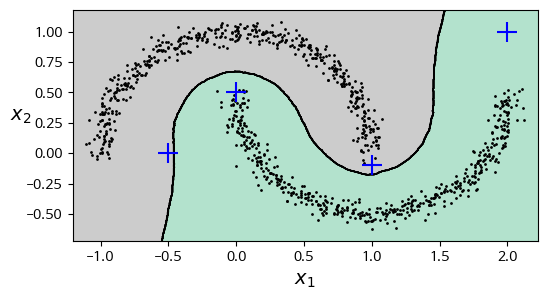

In [117]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

- 최대 거리를 이용한 샘플 분류

In [118]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

# 2. 가우스 혼합 (GMM)
> 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우스 분포에 생성되었다고 가정하는 확률적 모델
## 특징 
- 하나의 가우스 분표에서 생성된 모든 샘플을 하나의 클러스터로 형성 
- 일반적으로 타원형 클러스터 생성 
- 가장 간단한 버전 : `GaussianMixture` 클래스 사용

## 원리 
- 가우스 분포의 개수 : k 
- 데이터셋 X는 다음의 확률 과정을 통해 생성됨 
 - 샘플마다 k개의 클러스터에서 랜덤하게 한 클래스 선택 
    - j번째 클러스터를 선택할 확률 = $\phi$
    -  i번째 샘플을 선택한 클러스터 = $z^{(i)}$
  - i번째 샘플이 j번째 클러스터에 할당 되면 ($z^{(i)}=j$) 샘플의 위치 $x^{(i)}$ 는 평균이 $\mu^{(i)}$ 이고 공분산 행렬이 $\Sigma^{(j)}$인 가우스 분포에서 샘플링 됨
    -  표현식 : $x^{(i)} \text{\textasciitilde} N(\mu^{(j)},\Sigma^{(j)})$

In [123]:
from sklearn.mixture import GaussianMixture

### 데이터셋 생성 
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

### 가우시안 혼합 모델 선언
gm = GaussianMixture(n_components=3, n_init=10,random_state=42)
gm.fit(X)

### 추정한 파라미터 확인 
print("가중치 \n", gm.weights_)
print("평균 \n", gm.means_)
print("공분산 행렬 \n", gm.covariances_)

### 알고리즘 수렴 여부 및 반복횟수 
print("수렴 여부 : ", gm.converged_)
print("반복 횟수 : ", gm.n_iter_)

가중치 
 [0.40005972 0.20961444 0.39032584]
평균 
 [[-1.40764129  1.42712848]
 [ 3.39947665  1.05931088]
 [ 0.05145113  0.07534576]]
공분산 행렬 
 [[[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]

 [[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]

 [[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]]
수렴 여부 :  True
반복 횟수 :  4


### GaussianMixture의 원리 
- EM 알고리즘 (EM) 사용 

#### 기댓값 단계 
- 샘플을 클러스터에 할당 
#### 최대화 단계
- 클러스터 업데이트 

#### K-평균과의 차이점
- EM은 클러스터를 할당하는 것이 아닌 `소프트 클러스터` 할당 
  - `확률`을 통해 샘플이 각 클러스터에 속할 확률을 계산
- 최대화 단계에서 모든 샘플을 사용해 확률이 업데이트 됨 
- 클러스터에 속할 추정 확률로 샘플에 가중치가 적용 -> `클러스터의 책임`
- 새로운 샘플을 가장 비슷한 클러스터를 손쉽게 찾을 수 있음 

- 예시 : predict 메서드 사용

In [124]:
print("예측값 \n", gm.predict(X[:10]))
print("예측 확률 : \n", gm.predict_proba(X[:10]).round(3))

예측값 
 [2 2 0 2 0 0 2 0 0 2]
예측 확률 : 
 [[0.    0.023 0.977]
 [0.001 0.016 0.983]
 [1.    0.    0.   ]
 [0.    0.008 0.992]
 [1.    0.    0.   ]
 [0.994 0.    0.006]
 [0.    0.007 0.993]
 [0.968 0.001 0.031]
 [1.    0.    0.   ]
 [0.    0.002 0.998]]


### 생성 모델
- 새로운 샘플을 생성 가능 

In [125]:
X_new , y_new = gm.sample(6)
print("새로운 샘플 \n", X_new)
print("새로운 샘플 레이블 \n", y_new)

새로운 샘플 
 [[-2.32491052  1.04752548]
 [-1.16654983  1.62795173]
 [ 1.84860618  2.07374016]
 [ 3.98304484  1.49869936]
 [ 3.8163406   0.53038367]
 [ 0.38079484 -0.56239369]]
새로운 샘플 레이블 
 [0 0 1 1 1 2]


### 확률밀도 함수 (PDF)
- 주어진 위치의 모델의 밀도 추정
- `score_samples` 메서드 사용
  - 나온 값의 지수값으로 샘플 위치의 PDF 값을 얻을 수 있음 
  - 이 값은 하나의 확률이 아닌 확률 밀도임 
  - 밀도이기 때문에 어떤 양수 값이 될 수 있음

In [126]:
gm.score_samples(X[:10]).round(2)

array([-2.61, -3.57, -3.33, -2.56, -3.39, -4.01, -3.24, -4.6 , -2.08,
       -2.67])

- `covariance_type` 하이퍼파라미터를 설정하여 알고리즘이 찾는 공분산 행렬에 제약 조건을 적용

    - `"spherical"`: 모든 클러스터는 구형이어야 하지만 직경이 다를 수 있습니다(즉, 분산이 다를 수 있음).
    - `"diag"`: 클러스터는 모든 크기의 타원형 모양을 취할 수 있지만 타원의 축은 축과 평행해야 합니다(즉, 공분산 행렬이 대각선이어야 함).
    - `"tied"`: 모든 클러스터는 동일한 모양을 가져야 하며, 이는 타원체일 수 있습니다(즉, 모두 동일한 공분산 행렬을 공유해야 함).
    - `"full"` (기본값): 제약 없이 모든 클러스터는 모든 크기의 타원형 모양을 취할 수 있습니다.

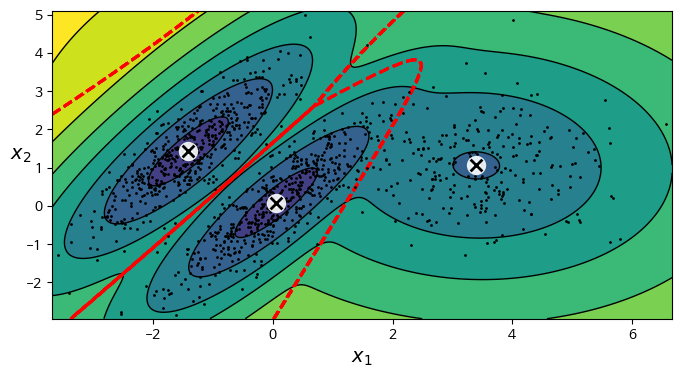

In [128]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.show()

## 가우스 혼합을 사용한 이상치 탐지 
- 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 간주 
  - 밀도의 임계 값을 설정해야만 함 

### 임계값 트레이드 오프 
- 거짓 양성 높음  -> 임계치를 낮춤 
- 거짓 음성 높음 -> 임계치를 높임

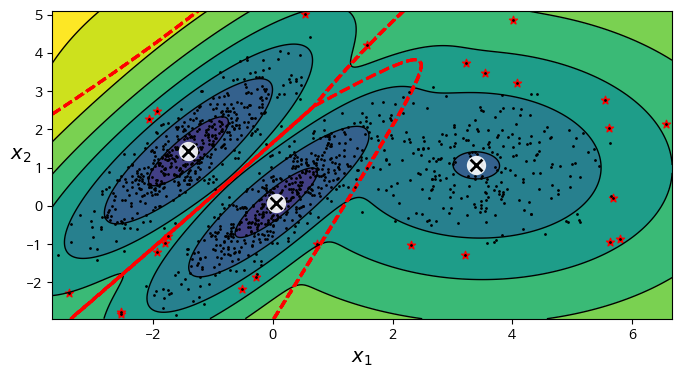

In [131]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

## 클러스터 개수 선택 
- 이론적 정보 기준을 최소화 하는 모델을 찾음 

### BIC와 AIC
- $BIC = log(m) p - 2log(\hat{L})$
- $AIC = 2p - - 2log(\hat{L})$
  - $m$ : 샘플의 개수 
  - $p$: 모델이 학습 할 `파라미터` 개수 
  - $\hat{L}$ : `가능도 함수`의 최댓값 
#### 원리 
- 학습 할 파라미터가 많은 모델에 벌칙을 가함
- 데이터에 잘 맞는 모델에는 보상을 추가 
#### 특징 
- BIC가 선택한 모델이 AIC가 선택한 모델보다 `간단`(파라미터가 적은) 경향
- 단, 데이터가 잘 맞지 않을 수도 있음 
#### 가능도 함수 (Likelihood)
> 출력 x를 알고 있을 때의 파라미터 값 $\theta$가 얼마나 그럴듯 한지 

- 예시 : 클러스터 k에 대한 AIC와 BIC의 차이 

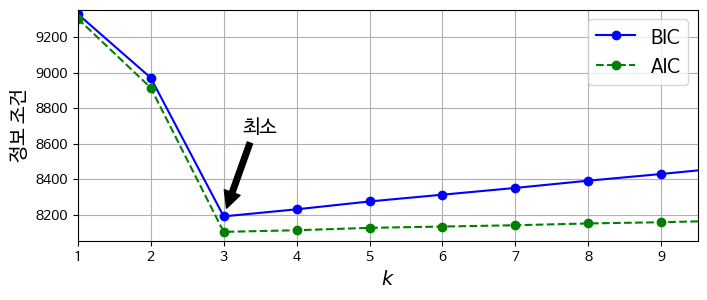

In [132]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("정보 조건")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "최소", horizontalalignment="center")
plt.legend()
plt.grid()
plt.show()

## 베이즈 가우스 혼합 모델 
- `최적의 클러스터 개수`를 수동으로 찾지 않고 불필요한 클러스터의 가중치만 0에 가깝게 만듦 
- 사용 클러스터 `BayesianGaussianMixture` 클래스 
    - `n_components` : 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 설정 필요 
    - 알고리즘이 자동으로 불필요한 클러스터를 제거 
- 밀도 추정용으로도 나쁘지 않은 성능을 보여줌

- 예시 : 클러스터 개수를 10으로 설정한 경우
  - 3번째 요소 까지 유의미함 -> 클러스터가 3개가 필요함 감지 

In [134]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

### 가중치 출력 
bgm.weights_.round(2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

- 장점 : 타원형 클러스터에는 잘 작동
- 단점 : 다른 모양을 가진 클러스터에서는 잘 작동하지 않음 

- 예시 : 타원형 모양이 아닌 데이터를 베이즈-가우스 혼합 모델 사용 
  - 타원형으로 하려고 해버림 

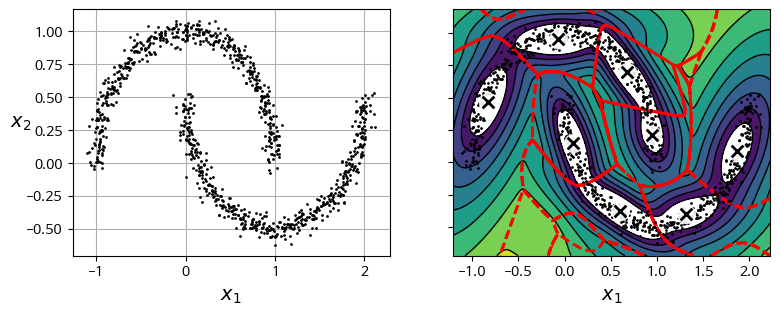

In [135]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()